In [1]:
import pandas as pd

df = pd.read_csv('data/templates_repo.csv')

# remove issue_files and pull_request_files columns that have nan values and just ',' in them
df = df.dropna(subset=['issue_files', 'pull_request_files'], how='all')
df = df[(df['issue_files'] != ',') & (df['pull_request_files'] != ',')]
df = df.reset_index(drop=True)

df = df.drop_duplicates(subset=['nameWithOwner', 'owner'], keep='first')
df = df.reset_index(drop=True)

df['issue_files_to_str'] = df['issue_files'].apply(lambda x: x.replace('[', ''))
df['issue_files_to_str'] = df['issue_files_to_str'].apply(lambda x: x.replace(']', ''))
df['issue_files_to_str'] = df['issue_files_to_str'].apply(lambda x: x.replace("'", ''))
df['issue_files_to_str'] = df['issue_files_to_str'].apply(lambda x: x.replace(" ", ''))

df['pull_request_files_to_str'] = df['pull_request_files'].apply(lambda x: x.replace('[', ''))
df['pull_request_files_to_str'] = df['pull_request_files_to_str'].apply(lambda x: x.replace(']', ''))
df['pull_request_files_to_str'] = df['pull_request_files_to_str'].apply(lambda x: x.replace("'", ''))
df['pull_request_files_to_str'] = df['pull_request_files_to_str'].apply(lambda x: x.replace(" ", ''))

df['len_of_issue_files'] = df['issue_files_to_str'].apply(lambda x: len(x.split(',')))
df['len_of_pull_request_files'] = df['pull_request_files_to_str'].apply(lambda x: len(x.split(',')))

processed_df = df.drop(columns=['issue_files', 'pull_request_files'])

processed_df.head()

,primaryLanguage,description,hasWikiEnabled,stargazerCount,nameWithOwner,owner,issue_files_to_str,pull_request_files_to_str,len_of_issue_files,len_of_pull_request_files
0,JavaScript,The library for web and native user interfaces,True,206947,facebook/react,facebook,bug_report.md,PULL_REQUEST_TEMPLATE.md,1,1
1,None,A book series on JavaScript. @YDKJS on twitter.,False,167317,getify/You-Dont-Know-JS,getify,"content-question.md,foreign-translation-reques...",PULL_REQUEST_TEMPLATE.md,4,1
2,Python,"A curated list of awesome Python frameworks, l...",False,166832,vinta/awesome-python,vinta,add-xxx.md,PULL_REQUEST_TEMPLATE.md,1,1
3,Dart,Flutter makes it easy and fast to build beauti...,True,152884,flutter/flutter,flutter,"4_performance_others.md,5_performance_speed.md...",PULL_REQUEST_TEMPLATE.md,3,1
4,TypeScript,Visual Studio Code,True,145835,microsoft/vscode,microsoft,"bug_report.md,feature_request.md",pull_request_template.md,2,1


In [2]:

# print the total number of repositories
print('Total number of repositories: ', len(processed_df))

Total number of repositories:  538


In [2]:
# print the columns of the dataframe
print('Columns of the dataframe: ', processed_df.columns)

Columns of the dataframe:  Index(['primaryLanguage', 'description', 'hasWikiEnabled', 'stargazerCount',
       'nameWithOwner', 'owner', 'issue_files_to_str',
       'pull_request_files_to_str', 'len_of_issue_files',
       'len_of_pull_request_files'],
      dtype='object')


In [3]:
import re

In [3]:
print(f'Number of rows which has len_of_issue_files > 1: {len(processed_df[processed_df["len_of_issue_files"] > 1])}')
print(f'Number of rows which has len_of_pull_request_files > 1: {len(processed_df[processed_df["len_of_pull_request_files"] > 1])}')
print('Total', len(processed_df))

Number of rows which has len_of_issue_files > 1: 442
Number of rows which has len_of_pull_request_files > 1: 20
Total 538


In [5]:
# percentage of repos that have more than 1 issue file
print(f'Percentage of repos that have more than 1 issue file: {len(processed_df[processed_df["len_of_issue_files"] > 1]) / len(processed_df) * 100}%')
print(f'Percentage of repos that have more than 1 pull request file: {len(processed_df[processed_df["len_of_pull_request_files"] > 1]) / len(processed_df) * 100}%')


Percentage of repos that have more than 1 issue file: 82.15613382899627%
Percentage of repos that have more than 1 pull request file: 3.717472118959108%


In [5]:
# average number of files per issue and pull request
print(f'Average number of files per issue: {processed_df["len_of_issue_files"].mean()}')
print(f'Average number of files per pull request: {processed_df["len_of_pull_request_files"].mean()}')


Average number of files per issue: 2.687732342007435
Average number of files per pull request: 1.0743494423791822


In [10]:

# unique langauges and their len_of_issue_files and len_of_pull_request_files amd their percentage of having more than 1 file and average number of files per issue and pull request 
unique_languages = processed_df['primaryLanguage'].unique()
print(f'Number of unique languages: {len(unique_languages)}')

# sort unique_languages by number of repos
unique_languages = processed_df.groupby('primaryLanguage').count().sort_values(by='nameWithOwner', ascending=False).index

for language in unique_languages:
    print(f'Language: {language}')
    if language == 'Assembly':
        print('Repo:' , processed_df[processed_df['primaryLanguage'] == language]['nameWithOwner'].values)
    print(f'Number of repos: {len(processed_df[processed_df["primaryLanguage"] == language])}')
    print(f'Number of repos that have more than 1 issue file: {len(processed_df[(processed_df["primaryLanguage"] == language) & (processed_df["len_of_issue_files"] > 1)])}')
    print(f'Number of repos that have more than 1 pull request file: {len(processed_df[(processed_df["primaryLanguage"] == language) & (processed_df["len_of_pull_request_files"] > 1)])}')
    print(f'Percentage of repos that have more than 1 issue file: {len(processed_df[(processed_df["primaryLanguage"] == language) & (processed_df["len_of_issue_files"] > 1)]) / len(processed_df[processed_df["primaryLanguage"] == language]) * 100}%')
    print(f'Percentage of repos that have more than 1 pull request file: {len(processed_df[(processed_df["primaryLanguage"] == language) & (processed_df["len_of_pull_request_files"] > 1)]) / len(processed_df[processed_df["primaryLanguage"] == language]) * 100}%')
    print(f'Average number of files per issue: {processed_df[processed_df["primaryLanguage"] == language]["len_of_issue_files"].mean()}')
    print(f'Average number of files per pull request: {processed_df[processed_df["primaryLanguage"] == language]["len_of_pull_request_files"].mean()}')
    print('\n')

Number of unique languages: 25
Language: JavaScript
Number of repos: 88
Number of repos that have more than 1 issue file: 70
Number of repos that have more than 1 pull request file: 6
Percentage of repos that have more than 1 issue file: 79.54545454545455%
Percentage of repos that have more than 1 pull request file: 6.8181818181818175%
Average number of files per issue: 2.522727272727273
Average number of files per pull request: 1.0681818181818181


Language: Go
Number of repos: 64
Number of repos that have more than 1 issue file: 62
Number of repos that have more than 1 pull request file: 0
Percentage of repos that have more than 1 issue file: 96.875%
Percentage of repos that have more than 1 pull request file: 0.0%
Average number of files per issue: 3.1875
Average number of files per pull request: 1.0


Language: Python
Number of repos: 60
Number of repos that have more than 1 issue file: 50
Number of repos that have more than 1 pull request file: 2
Percentage of repos that have more

In [13]:


# check the number of same issue file names and count of it in the dataset 
issue_files = processed_df['issue_files_to_str'].tolist()
issue_files = [x.split(',') for x in issue_files]
issue_files = [item for sublist in issue_files for item in sublist]
# if the issue files name is bug_report or bug-report or bug report or Bug_report or bug or Bug just consider it as bug-report 
issue_files = [x.lower() for x in issue_files]
# change the issue file name to bug-report if it is 'bug' in the issue file name
issue_files = ['bug-report.md' if 'bug' in x else x for x in issue_files]
issue_files = ['feature-request.md' if 'feature' in x else x for x in issue_files]
issue_files = ['documentation.md' if 'doc' in x else x for x in issue_files]
issue_files = ['question.md' if 'question' in x else x for x in issue_files]
issue_files = ['proposal.md' if 'proposal' in x else x for x in issue_files]
issue_files = ['crash.md' if 'crash' in x else x for x in issue_files]
issue_files = ['translation.md' if 'translation' in x else x for x in issue_files]
issue_files = ['translation.md' if 'language' in x else x for x in issue_files]
issue_files = ['translation.md' if 'i18n' in x else x for x in issue_files]
# if the file name is 2 letter.md, add it to translation.md
issue_files = ['translation.md' if x.split('.')[0].isalpha() and len(x.split('.')[0]) == 2 else x for x in issue_files]


issue_files = [x for x in issue_files if x != '']
print(f'Number of unique issue file names: {len(set(issue_files))}')

# show all the unique issue file names and their count
from collections import Counter
issue_files = Counter(issue_files)
issue_files.most_common()


Number of unique issue file names: 150


[('bug-report.md', 486),
 ('feature-request.md', 386),
 ('question.md', 106),
 ('documentation.md', 58),
 ('proposal.md', 32),
 ('translation.md', 28),
 ('other.md', 14),
 ('discussion.md', 12),
 ('enhancement.md', 12),
 ('custom.md', 12),
 ('crash.md', 4),
 ('issue_template.md', 4),
 ('rfc.md', 4),
 ('security.md', 4),
 ('feedback.md', 4),
 ('submit-a-request.md', 4),
 ('support.md', 4),
 ('improvement.md', 4),
 ('new-issue.md', 4),
 ('blank_issue.md', 4),
 ('report-technical-mistake.md', 2),
 ('textual-grammar-typo.md', 2),
 ('add-xxx.md', 2),
 ('4_performance_others.md', 2),
 ('5_performance_speed.md', 2),
 ('6_infrastructure.md', 2),
 ('request-for-comment-template.md', 2),
 ('1_broken_site.md', 2),
 ('2_site_support_request.md', 2),
 ('others.md', 2),
 ('translate.md', 2),
 ('01-pkgsite.md', 2),
 ('02-pkgsite-removal.md', 2),
 ('03-gopls.md', 2),
 ('04-vuln.md', 2),
 ('lib_change.md', 2),
 ('types-not-correct-in-with-callback.md', 2),
 ('ci-sev.md', 2),
 ('disable-ci-jobs.md', 2),

In [19]:
# most common issue file name and pull request file name
print(f'Most common issue file name: {issue_files.most_common(1)[0][0]}')
print(f'Most common issue file name count: {issue_files.most_common(1)[0][1]}')
print(f'Most common issue file name 2: {issue_files.most_common(2)[1][0]}')
print(f'Most common issue file name 2 count: {issue_files.most_common(2)[1][1]}')

Most common issue file name: bug-report.md
Most common issue file name count: 486
Most common issue file name 2: feature-request.md
Most common issue file name 2 count: 386


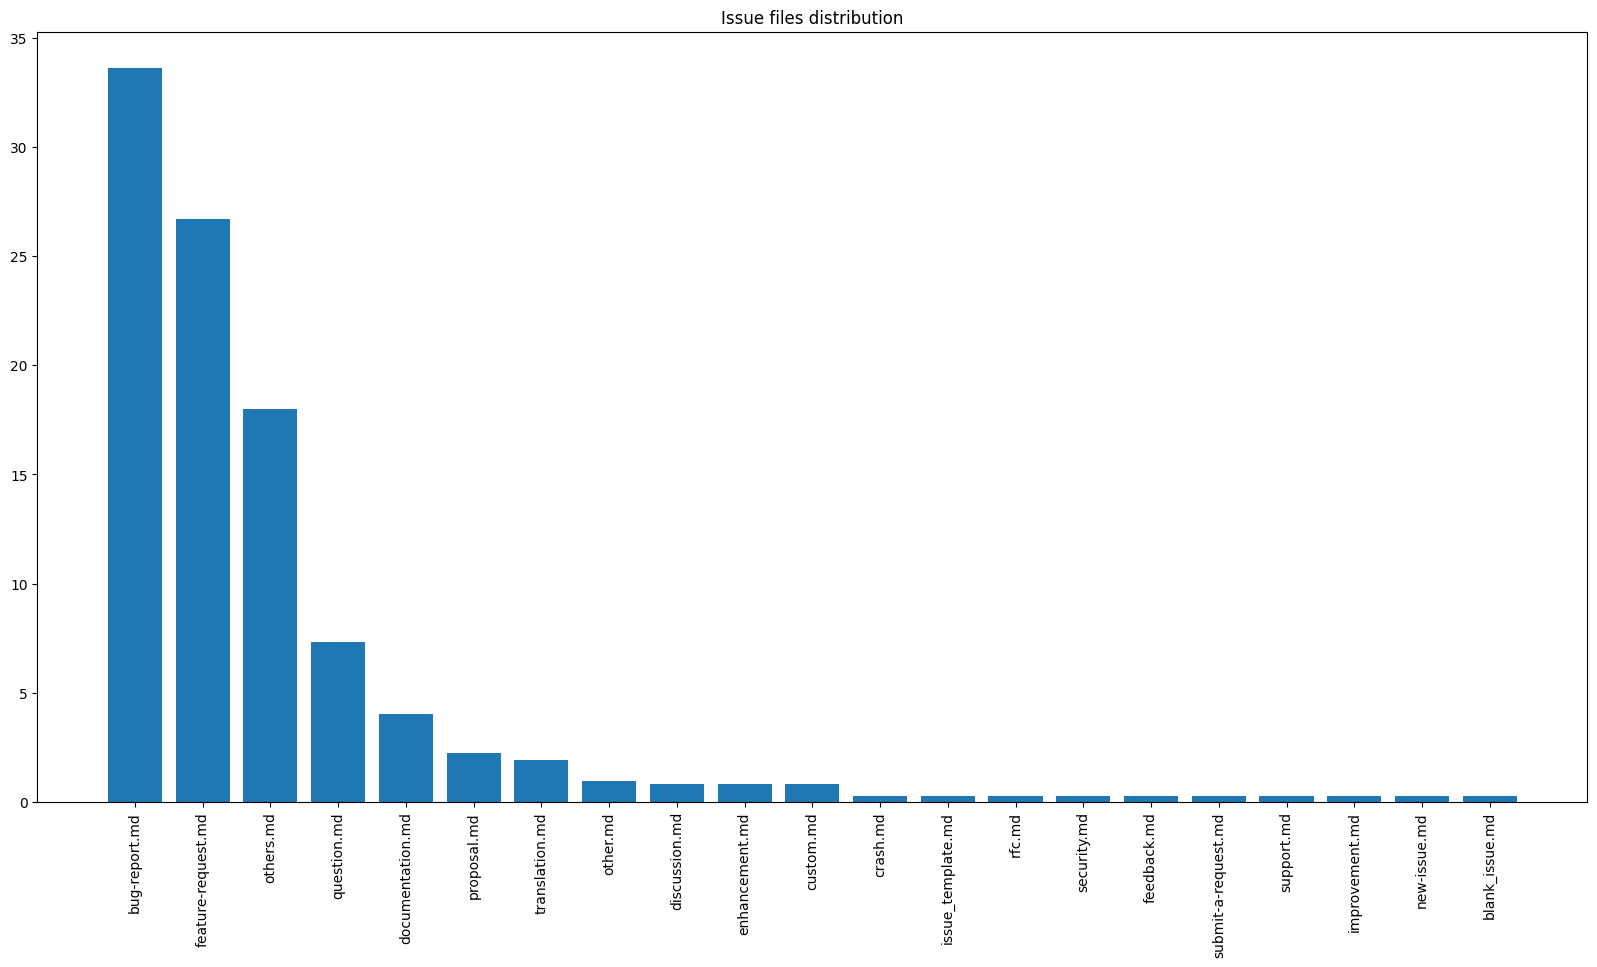

In [7]:
# put as a chart using matlab
import matplotlib.pyplot as plt
import numpy as np

issue_files = dict(issue_files)
# if the issue files is only 2,3 times in the dataset, add it as others.md 
issue_files['others.md'] = sum([v for k, v in issue_files.items() if v < 4])
issue_files = {k: v for k, v in issue_files.items() if v > 3}
issue_files = {k: v for k, v in sorted(issue_files.items(), key=lambda item: item[1], reverse=True)}

# show the chart in the percentage with total number of issue files
issue_files = {k: v / sum(issue_files.values()) * 100 for k, v in issue_files.items()}
issue_files = {k: v for k, v in sorted(issue_files.items(), key=lambda item: item[1], reverse=True)}


plt.figure(figsize=(20, 10))
plt.bar(range(len(issue_files)), list(issue_files.values()), align='center')
plt.xticks(range(len(issue_files)), list(issue_files.keys()), rotation=90)
plt.title('Issue files distribution')
plt.show()



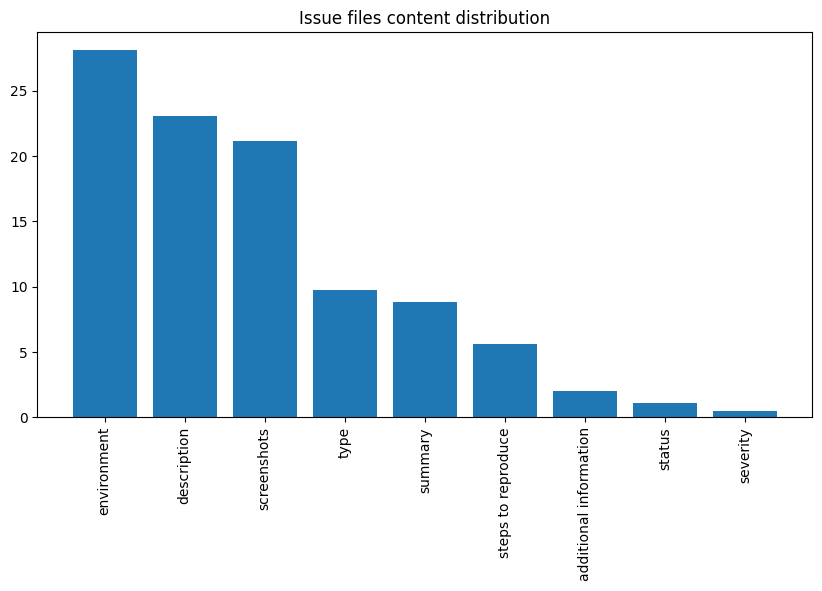

In [8]:
issue_files_content_df = pd.read_csv('data/individual_issue_contents.csv')
issue_files_content_df.head()
contents_of_file = {}
# read the body of the issue file and check if it has 'Summary'
for index, row in issue_files_content_df.iterrows():
    if type(row['body']) == float:
        continue
    if 'Summary' in row['body']:
        contents_of_file['summary'] = contents_of_file.get('summary', 0) + 1
    if 'Type' in row['body']:
        contents_of_file['type'] = contents_of_file.get('type', 0) + 1
    if 'Description' in row['body']:
        contents_of_file['description'] = contents_of_file.get('description', 0) + 1
    if 'Expected Behavior' in row['body']:
        contents_of_file['expected behavior'] = contents_of_file.get('expected/actual behavior', 0) + 1
    if 'Actual Behavior' in row['body']:
        contents_of_file['actual behavior'] = contents_of_file.get('expected/actual behavior', 0) + 1
    if 'Steps to Reproduce' in row['body']:
        contents_of_file['steps to reproduce'] = contents_of_file.get('steps to reproduce', 0) + 1
    if 'Reproducible in' in row['body']:
        contents_of_file['reproducible in'] = contents_of_file.get('reproducible in', 0) + 1
    if 'Environment' in row['body']:
        contents_of_file['environment'] = contents_of_file.get('environment', 0) + 1
    if 'Screenshots' in row['body']:
        contents_of_file['screenshots'] = contents_of_file.get('screenshots', 0) + 1
    if 'Additional Information' in row['body']:
        contents_of_file['additional information'] = contents_of_file.get('additional information', 0) + 1
    if 'Status' in row['body']:
        contents_of_file['status'] = contents_of_file.get('status', 0) + 1
    if 'Priority' in row['body']:
        contents_of_file['priority'] = contents_of_file.get('priority', 0) + 1
    if 'Severity' in row['body']:
        contents_of_file['severity'] = contents_of_file.get('severity', 0) + 1
    if 'Resolution' in row['body']:
        contents_of_file['resolution'] = contents_of_file.get('resolution', 0) + 1
    
    
contents_of_file = {k: v for k, v in sorted(contents_of_file.items(), key=lambda item: item[1], reverse=True)}
contents_of_file = {k: v for k, v in contents_of_file.items() if v > 3}

# show the chart in the percentage with total number of issue files
contents_of_file = {k: v / sum(contents_of_file.values()) * 100 for k, v in contents_of_file.items()}
contents_of_file = {k: v for k, v in sorted(contents_of_file.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(10, 5))
plt.bar(range(len(contents_of_file)), list(contents_of_file.values()), align='center')
plt.xticks(range(len(contents_of_file)), list(contents_of_file.keys()), rotation=90)
plt.title('Issue files content distribution')
plt.show()

        
        

In [9]:

# check the number of same issue file names and count of it in the dataset 
pull_request_files = processed_df['pull_request_files_to_str'].tolist()
pull_request_files = [x.split(',') for x in pull_request_files]
pull_request_files = [item for sublist in pull_request_files for item in sublist]
# if the issue files name is bug_report or bug-report or bug report or Bug_report or bug or Bug just consider it as bug-report
pull_request_files = [x.lower() for x in pull_request_files]
pull_request_files = ['pull-request.md' if 'pull' in x else x for x in pull_request_files]
pull_request_files 


pull_request_files = [x for x in pull_request_files if x != '']
print(f'Number of unique pull request file names: {len(set(pull_request_files))}')

# show all the unique pull request file names and their count
from collections import Counter
pull_request_files = Counter(pull_request_files)
pull_request_files.most_common()



Number of unique pull request file names: 23


[('pull-request.md', 524),
 ('translation_checklist.md', 4),
 ('bugfix.md', 4),
 ('failing_test.md', 4),
 ('improvement.md', 4),
 ('new_feature.md', 4),
 ('project_pr.md', 2),
 ('translation_checklist.pt.md', 2),
 ('release_template.md', 2),
 ('documentation-edit.md', 2),
 ('documentation-new.md', 2),
 ('car_bugfix.md', 2),
 ('car_port.md', 2),
 ('fingerprint.md', 2),
 ('refactor.md', 2),
 ('tuning.md', 2),
 ('cypress_repro.md', 2),
 ('servicing.md', 2),
 ('new_example.md', 2),
 ('translation.md', 2),
 ('badges.md', 2),
 ('pr.md', 2),
 ('fix.md', 2)]

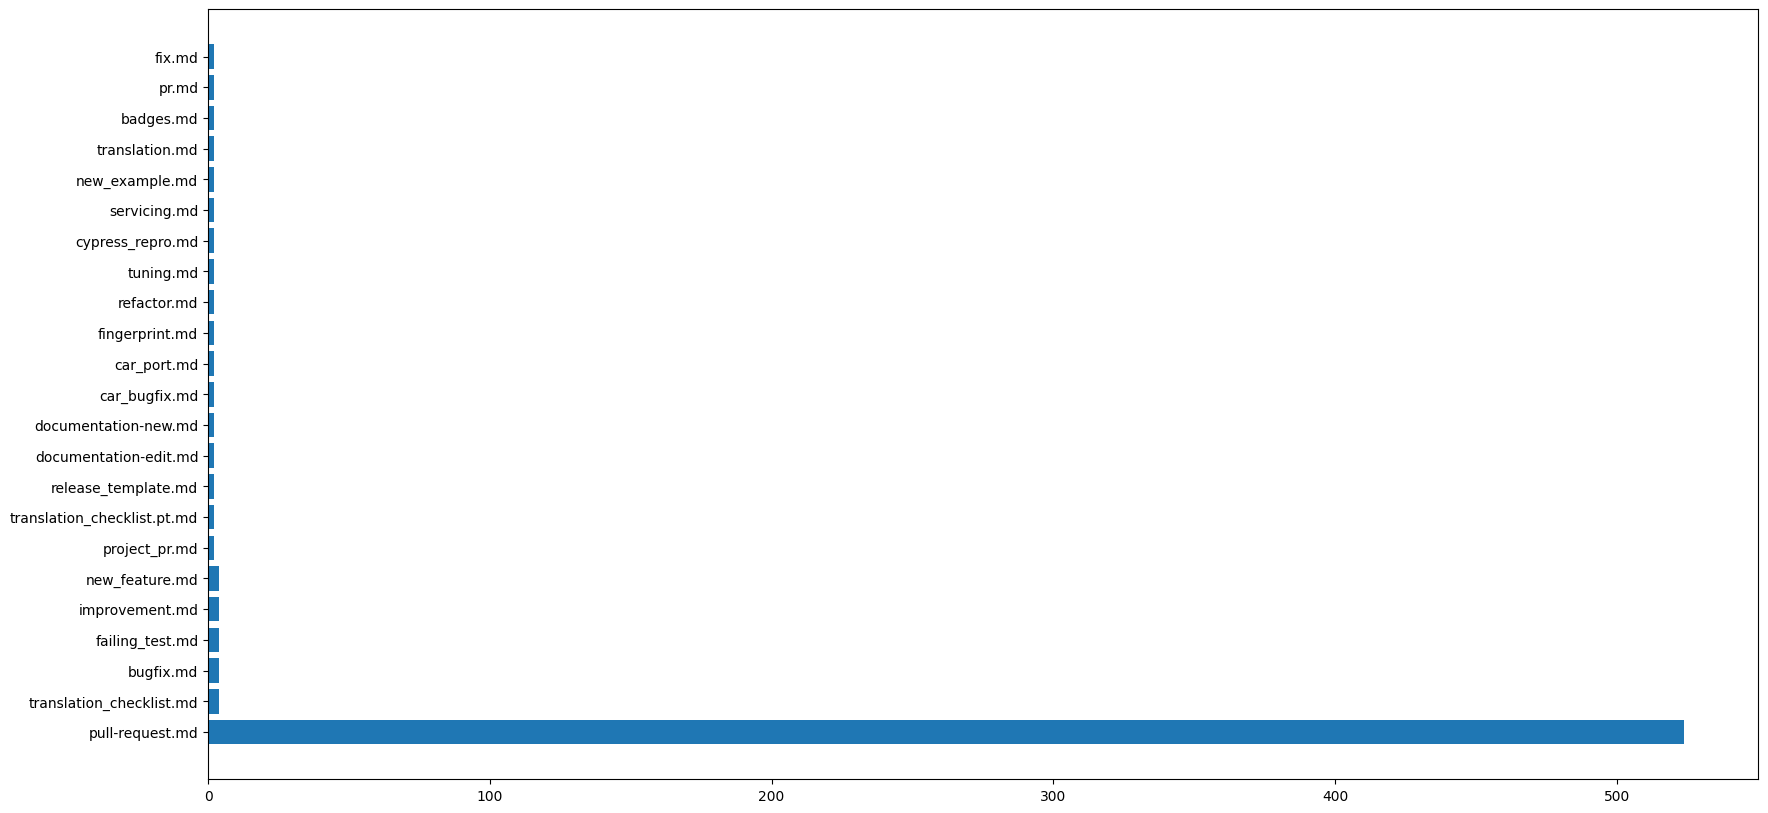

In [10]:
# put as a chart using matlab
import matplotlib.pyplot as plt
import numpy as np

pull_request_files = dict(pull_request_files)
# if the issue files is only 2,3 times in the dataset, add it as others.md
# pull_request_files['others.md'] = sum([v for k, v in pull_request_files.items() if v < 4])
# pull_request_files = {k: v for k, v in pull_request_files.items() if v > 3}
pull_request_files = {k: v for k, v in sorted(pull_request_files.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(20, 10))
# put the file name on y axis and count on x axis
plt.barh(list(pull_request_files.keys()), list(pull_request_files.values()))
plt.show()


In [3]:
import pandas as pd
# load individual pull request contents
pull_request_files_content_df = pd.read_csv('data/individual_pr_contents.csv')
# print the total number of pull request files
print(f'Total number of pull request files: {len(pull_request_files_content_df)}')

issues_file_content_df = pd.read_csv('data/individual_issue_contents.csv')
# print the total number of pull request files
print(f'Total number of issue files: {len(issues_file_content_df)}')

# repo count of pull request files and issue files
print(f'Number of repos that have pull request files: {len(pull_request_files_content_df["repo"].unique())}')
print(f'Number of repos that have issue files: {len(issues_file_content_df["repo"].unique())}')

Total number of pull request files: 2601
Total number of issue files: 6574
Number of repos that have pull request files: 436
Number of repos that have issue files: 436


In [4]:
# print the columns of the dataframe
print('Columns of the dataframe: ', pull_request_files_content_df.columns)

Columns of the dataframe:  Index(['repo', 'owner', 'pr_file', 'body'], dtype='object')
